# Proyecto completo de Machine Learning - Inversiones inmobiliarias

## Imagen general / problema a resolver

La empresa **Alan Turing Real State** nos ha contratado para construir un modelo de los precios de las viviendas de California.

Este modelo debe predecir el precio medio de las viviendas de un distrito en función de los datos que tenemos de él.

La finalidad es encontrar oportunidades de inversión.

<img src="https://drive.google.com/uc?id=1XHMTF2XOqrEoR-Qar5MnyOc183MjFaI0">

Vamos a tener los siguientes datos sobre los distritos:

* Longitud
* Latitud
* Edad media de los inmuebles
* Superficie total
* Total de habitaciones
* Total de dormitorios
* Población
* Número de viviendas
* Media de ingresos
* Valor medio de la vivienda
* Proximidad a la costa

Los datos están etiquetados y queremos saber un valor concreto, por tanto, se trata de un sistema **supervisado**.

Vamos a predecir un valor, por tanto, estamos ante un problema de **regresión**, en concreto de **regresión múltiple**, ya que tenemos muchas características para hacer la predicción.

En un problema de regresión hay varias medidas que pueden dar el rendimiento. Nosotros vamos a usar la **raiz del error cuadrático medio**, en inglés, **Root Mean Square Error (RMSE)**.




$RMSE(X, h)=\sqrt{\frac{1}{m}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}$

$m$ es el número de instancias (casos)

$x^{(i)}$ es el vector de todas las características (sin incluir la etiqueta) de la $i$-ésima instancia del dataset.

$y^{(i)}$ es la salida deseada para esa instancia.

Por ejemplo, si un distrito del dataset está localizado en una longitud de -18.29º, una latitud de 33.91º, tiene 1416 habitantes con una media de ingresos de 38372 dólares y el valor medio de la vivienda es de 156400 dólares (ignorando otras características de momento), entonces:

$x^{(1)} =
\left (
  \begin{array}{r}
    -18.29\\
    33.91\\
    1416\\
    38372
  \end{array}
\right )
$

$y^{(1)}=156400$

$X$ es la matriz que contiene las características del dataset.

$X =
\left (
  \begin{array}{cccc}
    -18.29 & 33.91 & 1416 & 38372\\
    . & . & . & . &\\
    . & . & . & . &\\
    . & . & . & . &\\
  \end{array}
\right )
$

$h$ es la función de predicción, también llamada hipótesis.

Cuando al sistema se le dan las características de una instancia $x^{(i)}$, su salida predice un valor $\hat{y}^{(i)}=h(x^{(i)})$

Por ejemplo, si el sistema predice que el precio medio de la vivienda para el primer distrito es de 158400 dólares, entonces $\hat{y}^{(1)}=h(x^{(1)})=158400$

El error de predicción para este distrito es de $\hat{y}^{(1)}-{y}^{(1)}=158400-156400=2000$



## Obtención de los datos

Los datos están contenidos en el fichero `housing.csv` (en Moodle).

Importamos Numpy, Pandas, Matplotlib y Seaborn.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datos en un Dataframe de pandas.

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
file_path = '/content/drive/MyDrive/IA_datasets/housing.csv'
housing = pd.read_csv(file_path)

## Exploración y visualización de los datos

In [68]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El atributo `total_bedrooms` presenta muchos valores nulos.

Vemos los diferentes valores que puede tener el atributo `ocean_proximity`

In [70]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

¿Cuántos casos hay de cada tipo? es decir ¿cuántos distritos tienen el valor `NEAR BAY`, cuántos `<1H OCEAN`, etc.

In [71]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

[Text(0, 0, '9136'),
 Text(0, 0, '6551'),
 Text(0, 0, '2658'),
 Text(0, 0, '2290'),
 Text(0, 0, '5')]

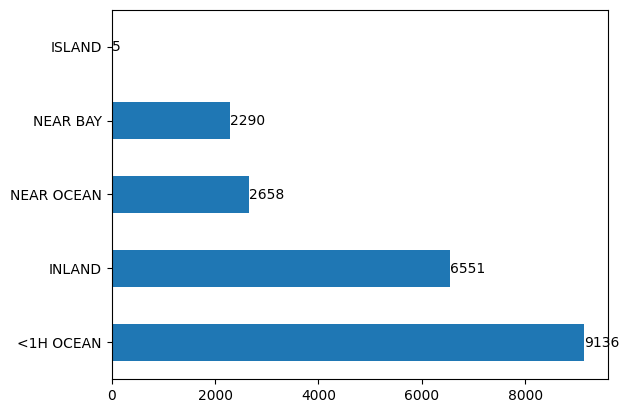

In [72]:
df_ocean_proximity = housing["ocean_proximity"].value_counts()

ax = df_ocean_proximity.plot.barh()

ax.bar_label(ax.containers[0])

Media, máximo, mínimo, percentiles, etc.

In [73]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


El 25% de los distritos tiene una media de edad inferior a 18 años.

¿Cuál es el precio del distrito más caro? 500001
Investigando sobre el dataset, hemos averiguado que se han topado a propósito los distritos con una media de precio de más de medio millón.

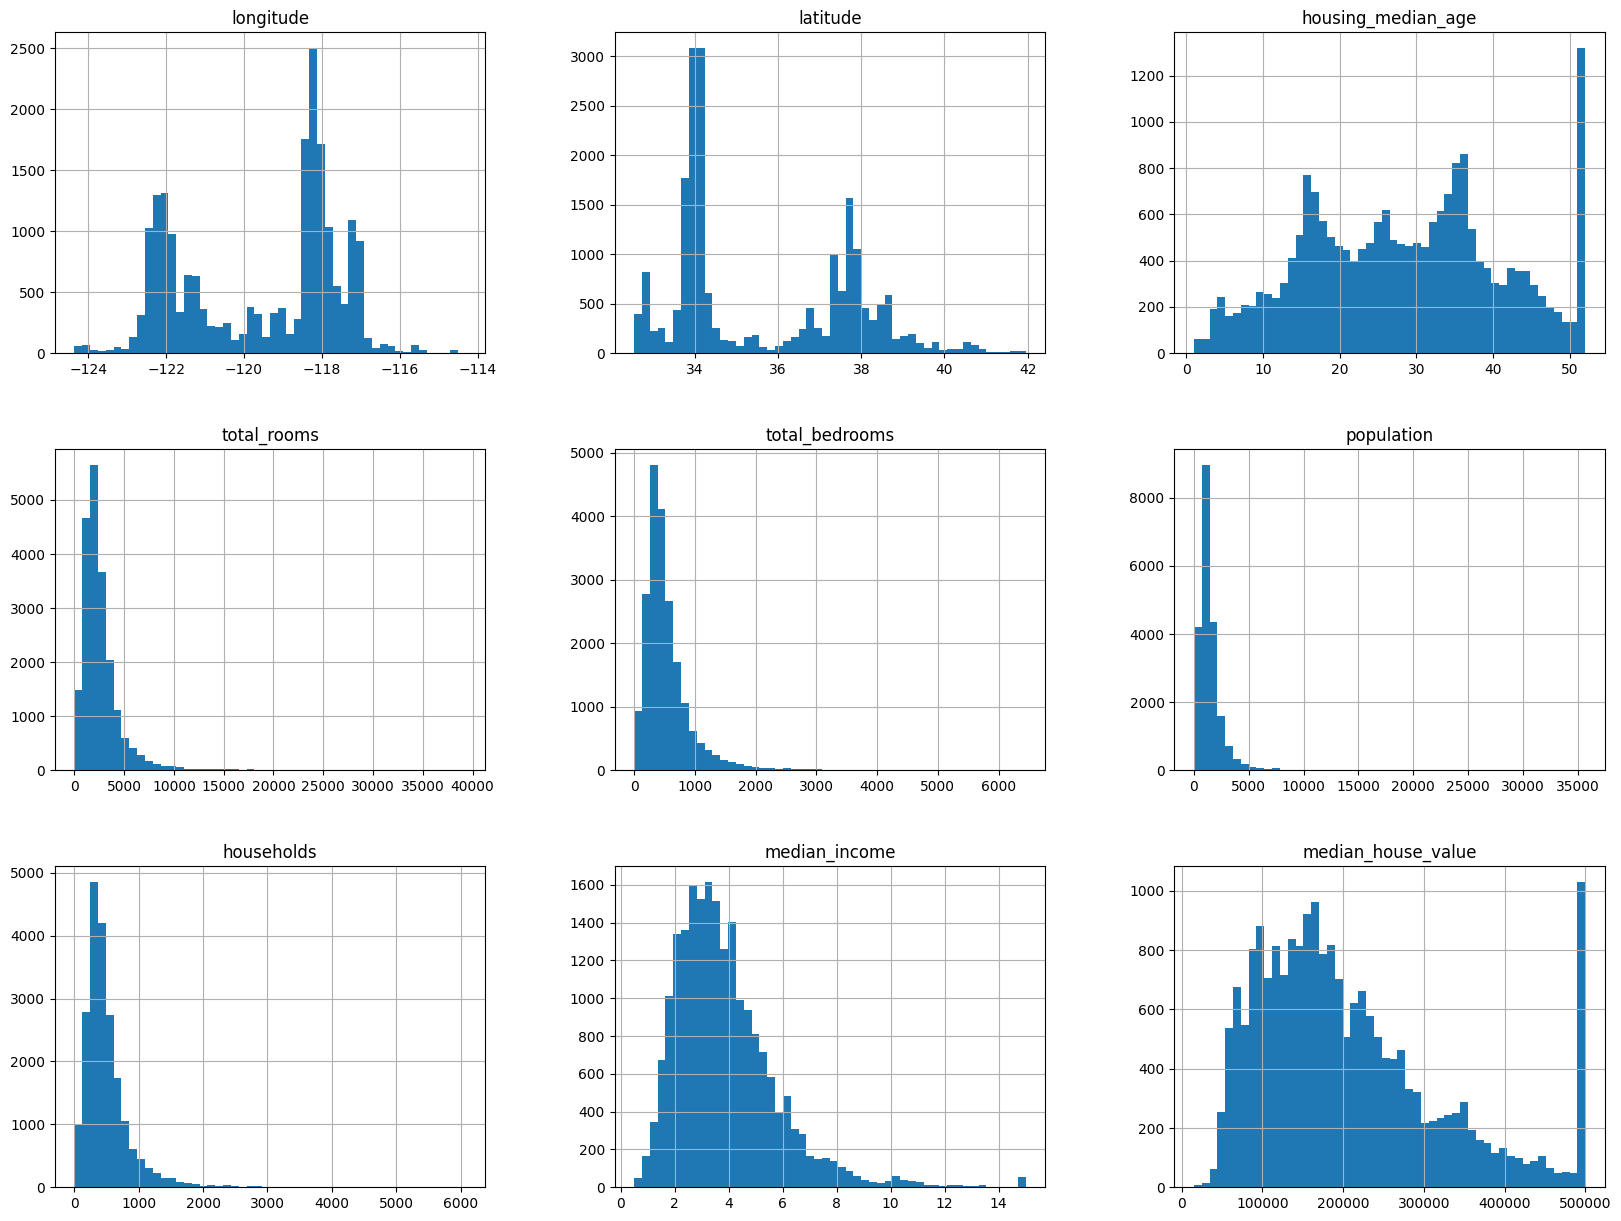

In [74]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

¿Qué podemos observar en los histogramas?

1. La media de edad y el precio están limitados.
2. Varios histogramas tienen una cola alargada (se extienden mucho más a la derecha de la media que a la izquierda)
3. Los atributos tienen escalas muy diferentes
4. Los ingresos no parecen estar expresados en dólares. Después de hablar con el equipo que recoiló los datos, sabemos que el dato de los ingresos ha sido escalado y limitado a 15 para los ingresos más altos y a 0.5 para los más bajos.

## Datos geográficos

<Axes: xlabel='longitude', ylabel='latitude'>

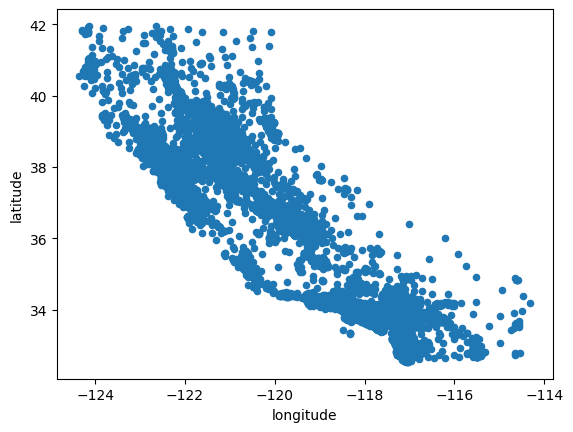

In [75]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Con puntos transparentes se pueden apreciar zonas con diferente densidad.

<Axes: xlabel='longitude', ylabel='latitude'>

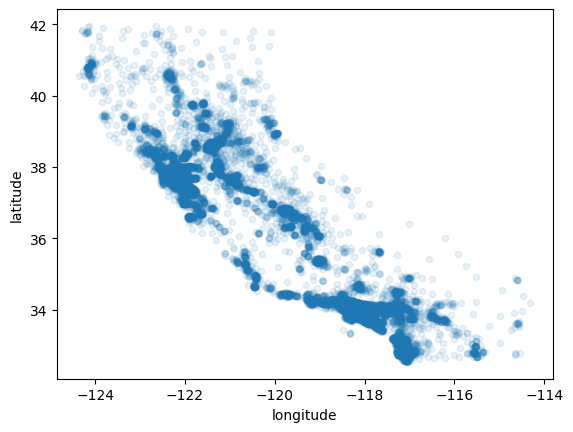

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Vamos a representar la población del distrito mediante el radio de cada circulito, mientras que usaremos el color para representar el precio.

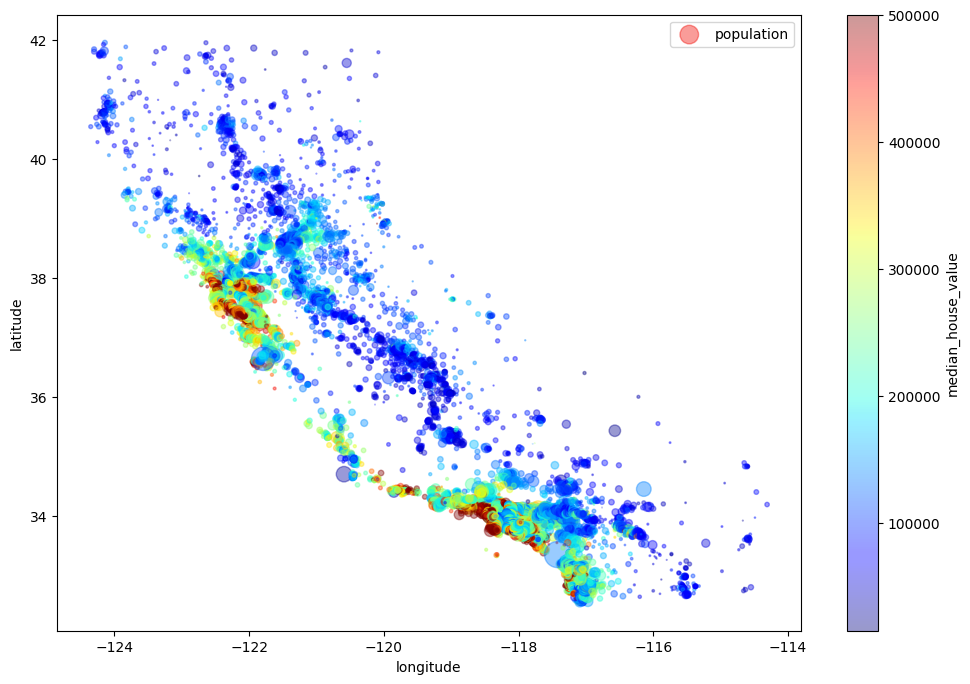

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(12,8),
             c="median_house_value", cmap="jet", colorbar=True)
plt.legend()

## Correlaciones

In [78]:
# Matriz de correlaciones

corr_matrix = housing.corr()
corr_matrix

<ipython-input-78-e635bbcc968e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [79]:
# Relación de cada uno de los atributos con el precio medio de la vivienda

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

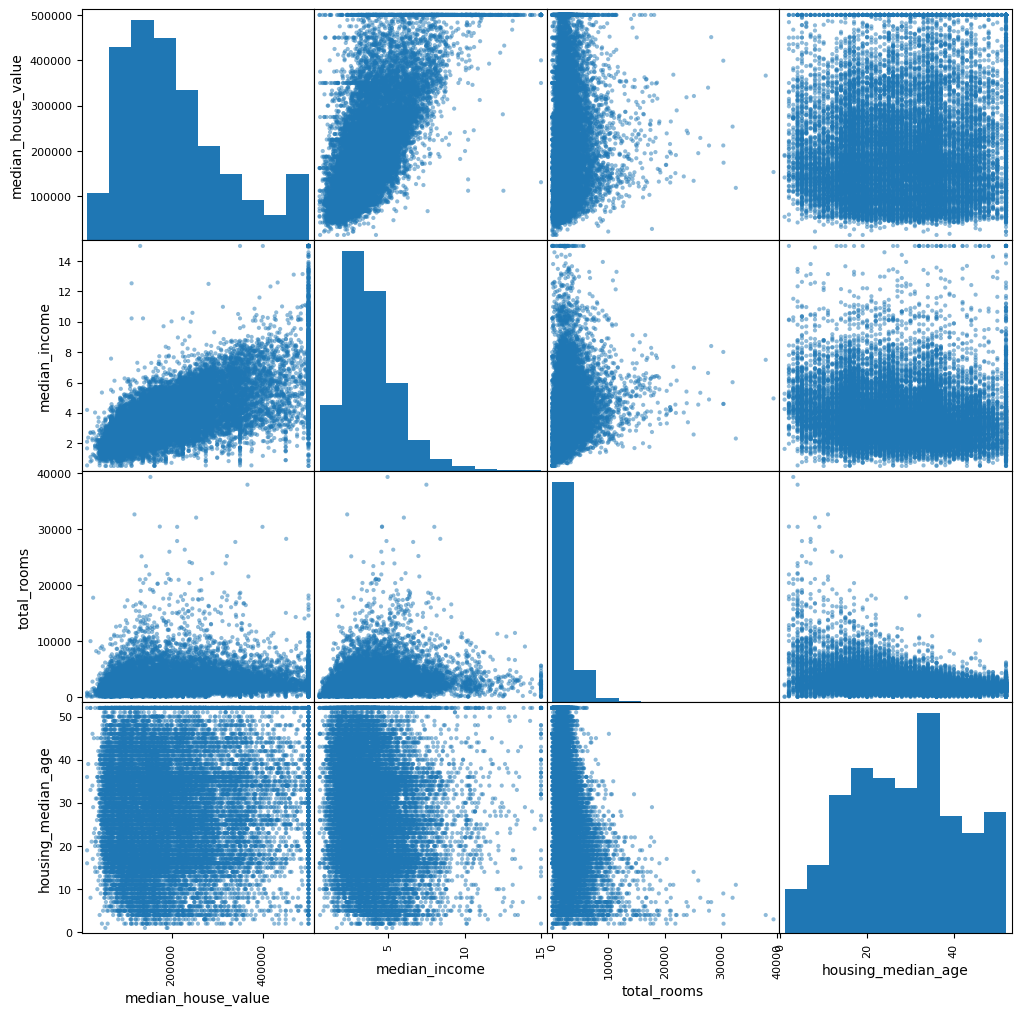

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12))
plt.show()

En las diagonales, en lugar de salir una línea recta de la forma $y=x$ que no sería muy útil, saca el histograma del atributo.

Se ve claramente la correlación entre `median_income` y `median_house_value`.

Mostremos esa gráfica por separado.

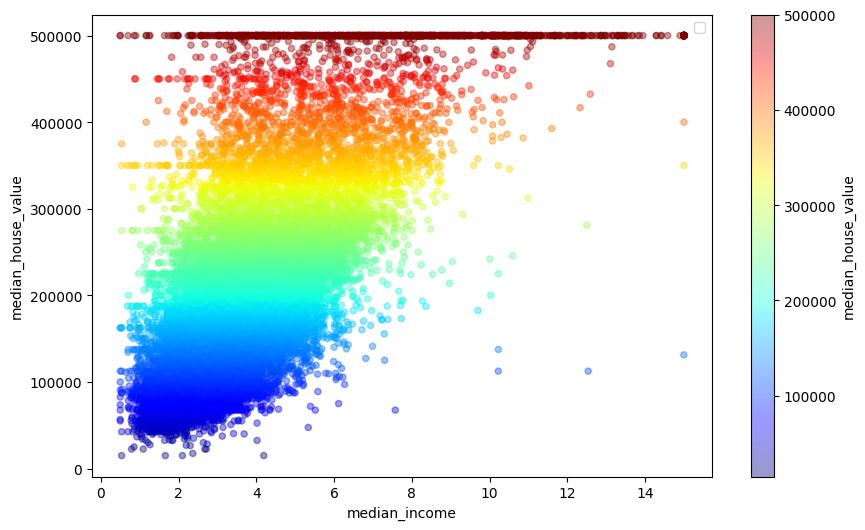

In [81]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4,
             figsize=(10,6), c="median_house_value", cmap="jet", colorbar=True)
plt.legend()
plt.show()

Para ver las relaciones entre los atributos, podemos usar también un mapa de calor.

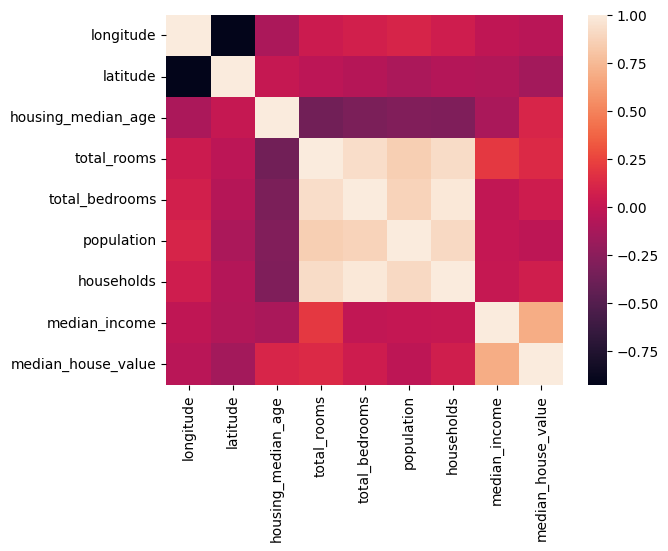

In [82]:
sns.heatmap(corr_matrix)
plt.show()

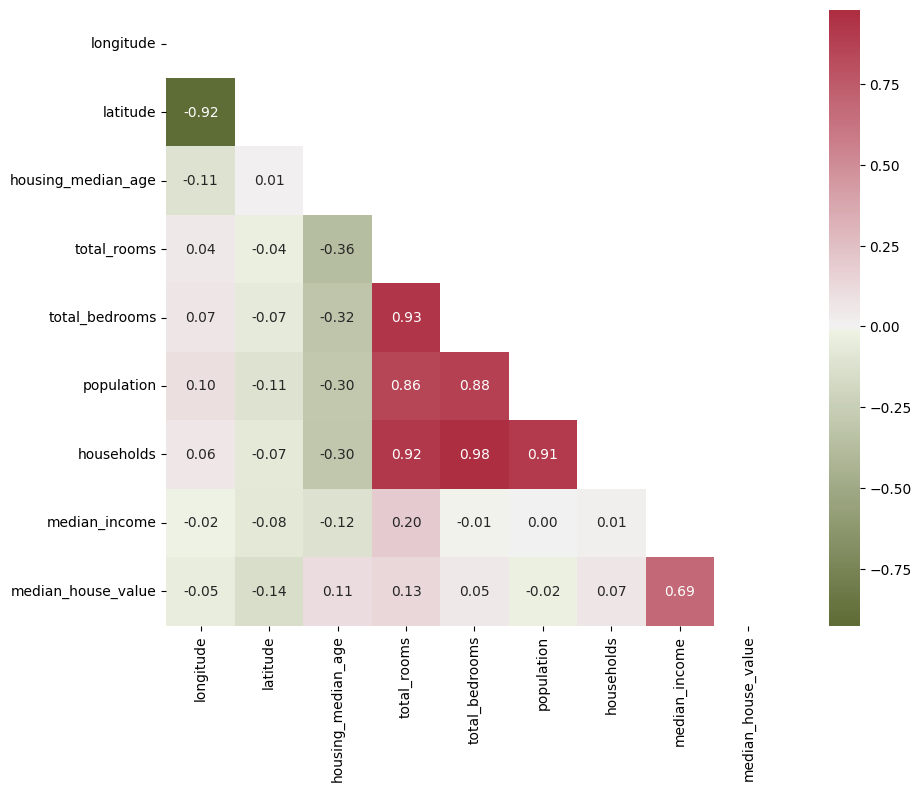

In [83]:
# Igual pero más bonito

# Crea una máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea una paleta personalizada
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.show()

Hay datos muy correlacionados como `households` y `total_bedrooms`. Nos indica que podríamos prescindir de alguno de ellos.

## Preparación de los datos

### Combinaciones de atributos (featuring engineering)

In [84]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


El número de habitaciones por distrito no dice mucho. Quizás sería más útil saber la media de habitaciones por vivienda.

Vamos a crear varios atributos nuevos en base a los que ya tenemos.

In [85]:
# Habitaciones por vivienda

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

In [86]:
# Dormitorios por vivienda

housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]


In [87]:
# Habitantes por vivienda

housing["population_per_household"] = housing["population"] / housing["households"]


In [88]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


Vamos a analizar los nuevos atributos.

In [89]:
attributes = ["rooms_per_household", "bedrooms_per_household", "population_per_household"]
housing[attributes].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.429000,1.097062,3.070655
std,2.474173,0.476104,10.386050
min,0.846154,0.333333,0.692308
25%,4.440716,1.006029,2.429741
50%,5.229129,1.048889,2.818116
75%,6.052381,1.099631,3.282261
max,141.909091,34.066667,1243.333333


Vemos de nuevo las correlaciones con respecto al valor de las viviendas.

In [90]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-90-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

Tenemos que decidir si nos quedamos con los nuevos atributos y borramos `total_rooms`, `total_bedrooms` y quizás también `population` o borramos los nuevos atributos y nos quedamos como antes.

Tomamos la decisión de borrar los atributos nuevos y continuar con el dataset original.

In [91]:
housing = housing.drop("rooms_per_household", axis=1)
housing = housing.drop("bedrooms_per_household", axis=1)
housing = housing.drop("population_per_household", axis=1)

In [92]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Gestión de nulos

La mayoría de algoritmos de ML no trabajan bien cuando faltan datos.

In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
# instancias incompletas

incomplete_rows = housing[housing.isnull().any(axis=1)]
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Tenemos tres opciones:

1. Quitar los distritos correspondientes
2. Quitar el atributo completo
3. Rellenar con algún valor (la media, la mediana, ceros, unos, etc.)

In [95]:
# opción 1: Eliminar los distritos con nulos.

housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)

housing_option1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [96]:
# opción 2: suprimir el atributo "distrito" completamente para todas las instancias.

housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)

housing_option2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [97]:
# opción 3: rellenar con algún valor (la media, la mediana, ceros, unos, etc.)

housing_option3 = housing.copy()
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)

housing_option3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Lo mejor sería continuar con las tres opciones por separado y ver cuál funciona mejor.

Ahora nos vamos a decantar por la primera opción, eliminar las filas con nulos.

In [98]:
housing.dropna(subset=["total_bedrooms"], inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Conversión de categorías a números

La mayoría de algoritmos de ML trabajan mejor con números que con categorías.

In [99]:
housing_cat = housing["ocean_proximity"].unique()
housing_cat

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

La conversión es especialmente aconsejable cuando tenemos categorías del tipo "muy malo", "malo", "regular", "bueno" y "muy bueno".

Vamos a convertir los valores de "ocean_proximity" en números.

In [100]:
housing["ocean_proximity"].replace(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], [0., 1., 2., 3., 4.], inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0


In [101]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


### Mezcla de datos


Antes de trocear el dataset vamos a "barajarlo" para asegurarnos de que no tenemos los datos agrupados por algún criterio.

El método `sample()` extrae una muestra aleatoria del dataframe.

In [102]:
# Extrae una fila

housing.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3900,-118.5,34.2,42.0,1558.0,322.0,884.0,334.0,2.2304,203800.0,1.0


In [103]:
# Extrae la mitad del dataframe

housing.sample(frac=0.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9458,-123.58,39.66,15.0,1839.0,489.0,887.0,332.0,2.2429,100000.0,1.0
11775,-121.33,38.77,3.0,20214.0,3559.0,8361.0,3112.0,4.2259,169300.0,0.0
12682,-121.40,38.55,26.0,2697.0,398.0,1088.0,389.0,5.0000,142500.0,0.0
1013,-121.76,37.68,52.0,2157.0,418.0,929.0,419.0,3.7301,204400.0,0.0
7313,-118.19,33.98,33.0,151.0,83.0,380.0,83.0,1.4224,189600.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9731,-121.72,36.81,18.0,1984.0,379.0,1078.0,359.0,3.2969,229900.0,1.0
4222,-118.26,34.12,52.0,2290.0,520.0,1278.0,485.0,3.8393,238200.0,1.0
11993,-117.53,34.02,19.0,256.0,34.0,101.0,28.0,5.3269,375000.0,0.0
12509,-121.45,38.56,52.0,3420.0,555.0,1301.0,530.0,4.0417,173800.0,0.0


In [104]:
# extrae todo el dataframe desordenado

housing.sample(frac=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17496,-119.80,34.43,27.0,3143.0,537.0,1760.0,570.0,4.6957,271500.0,2.0
14855,-117.07,32.65,12.0,4131.0,891.0,2272.0,840.0,3.4701,204900.0,2.0
15274,-117.27,33.06,7.0,3686.0,733.0,1612.0,672.0,3.1970,367100.0,2.0
18772,-122.29,40.43,21.0,2842.0,640.0,1658.0,608.0,1.9943,59800.0,0.0
4233,-118.30,34.11,25.0,1590.0,218.0,568.0,206.0,8.4389,500001.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4721,-118.37,34.04,52.0,1197.0,231.0,671.0,219.0,3.8250,278500.0,1.0
8720,-118.35,33.83,36.0,1102.0,193.0,522.0,172.0,6.1187,342000.0,1.0
4835,-118.29,34.04,31.0,700.0,299.0,1272.0,298.0,2.1542,128100.0,1.0
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,0.0


In [105]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [106]:
housing = housing.sample(frac=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18491,-121.58,37.03,16.0,3120.0,685.0,2383.0,681.0,3.5551,198600.0,0.0
13389,-117.58,34.10,4.0,6360.0,1584.0,3359.0,1396.0,3.5186,127800.0,0.0
1950,-120.83,38.74,17.0,3685.0,775.0,1714.0,734.0,2.2269,128300.0,0.0
19098,-122.62,38.24,33.0,1369.0,280.0,758.0,246.0,4.0341,156500.0,1.0
4702,-118.35,34.06,52.0,3446.0,1360.0,1768.0,1245.0,2.4722,500001.0,1.0


### Separación de la matriz de características $X$ de los datos de salida $y$ (el target)

In [107]:
y = housing['median_house_value']
y

18491    198600.0
13389    127800.0
1950     128300.0
19098    156500.0
4702     500001.0
           ...   
17774    205900.0
2529      66900.0
1978     115600.0
4989     116400.0
14422    244400.0
Name: median_house_value, Length: 20433, dtype: float64

In [108]:
X = housing.drop('median_house_value', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18491,-121.58,37.03,16.0,3120.0,685.0,2383.0,681.0,3.5551,0.0
13389,-117.58,34.10,4.0,6360.0,1584.0,3359.0,1396.0,3.5186,0.0
1950,-120.83,38.74,17.0,3685.0,775.0,1714.0,734.0,2.2269,0.0
19098,-122.62,38.24,33.0,1369.0,280.0,758.0,246.0,4.0341,1.0
4702,-118.35,34.06,52.0,3446.0,1360.0,1768.0,1245.0,2.4722,1.0
...,...,...,...,...,...,...,...,...,...
17774,-121.85,37.36,11.0,2109.0,592.0,2744.0,607.0,4.0452,1.0
2529,-122.22,39.51,17.0,1201.0,268.0,555.0,277.0,2.1000,0.0
1978,-120.32,38.71,13.0,1115.0,255.0,86.0,32.0,3.5667,0.0
4989,-118.31,34.00,47.0,1551.0,362.0,1329.0,322.0,1.9792,1.0


### Creación de los datos de entrenamiento y de prueba

Separamos el dataset en dos partes:

* Datos de entrenamiento (training set) - 80%
* Datos de prueba (test set) - 20% (si tenemos muchos datos el porcentaje es menor)



In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [110]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1244,-121.99,39.15,17.0,6440.0,1204.0,3266.0,1142.0,2.7137,0.0
12039,-117.46,33.90,10.0,9738.0,2130.0,4936.0,1840.0,3.3187,0.0
2053,-119.73,36.68,32.0,755.0,205.0,681.0,207.0,1.7986,0.0
16473,-121.26,38.11,8.0,2770.0,642.0,1611.0,633.0,3.1284,0.0
3276,-122.91,39.05,27.0,789.0,208.0,295.0,108.0,3.7667,0.0
...,...,...,...,...,...,...,...,...,...
1792,-122.38,37.91,18.0,3507.0,711.0,1224.0,676.0,5.0524,3.0
19457,-120.93,37.67,6.0,3491.0,657.0,2075.0,644.0,3.3844,0.0
2268,-119.81,36.79,35.0,2314.0,443.0,954.0,457.0,2.9506,0.0
9157,-118.46,34.42,25.0,2988.0,525.0,1884.0,513.0,4.7007,1.0


In [111]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12525,-121.48,38.56,46.0,1476.0,344.0,688.0,353.0,2.7316,0.0
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304,1.0
9863,-121.85,36.59,42.0,891.0,203.0,525.0,212.0,3.3156,1.0
19424,-121.02,37.71,25.0,207.0,41.0,87.0,43.0,3.6023,0.0
18435,-121.83,37.26,15.0,3243.0,551.0,1752.0,551.0,5.5849,1.0
...,...,...,...,...,...,...,...,...,...
18143,-122.06,37.34,20.0,3435.0,593.0,1293.0,553.0,6.7578,1.0
6741,-118.07,34.13,27.0,3787.0,913.0,1992.0,853.0,3.3010,0.0
14197,-117.03,32.71,34.0,2328.0,444.0,1684.0,429.0,3.2500,2.0
14395,-117.25,32.74,36.0,1240.0,310.0,577.0,319.0,2.6625,2.0


In [112]:
y_train

1244      72000.0
12039    144800.0
2053      49300.0
16473    115100.0
3276      95000.0
           ...   
1792     269800.0
19457    138500.0
2268      73800.0
9157     169500.0
9937     269300.0
Name: median_house_value, Length: 16346, dtype: float64

In [113]:
y_test

12525    134700.0
7884     194600.0
9863     186300.0
19424    131300.0
18435    257400.0
           ...   
18143    451400.0
6741     251200.0
14197     99600.0
14395    248200.0
12330     66000.0
Name: median_house_value, Length: 4087, dtype: float64

Si todo es correcto, la distribución de los datos de entrenamiento y de test debe se similar. Lo comprobamos con un par de atributos.

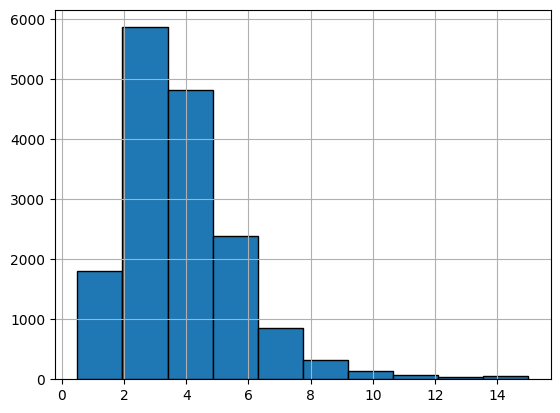

In [114]:
X_train['median_income'].hist(edgecolor="black")
plt.show()

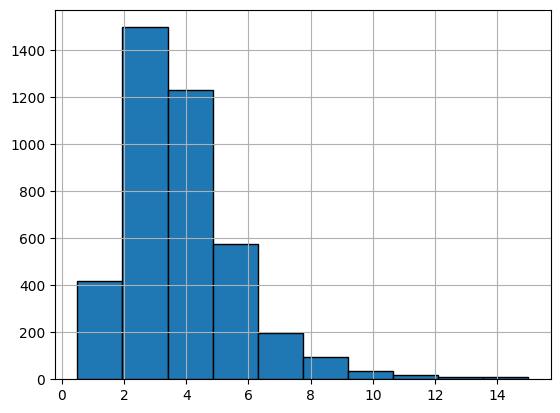

In [115]:
X_test['median_income'].hist(edgecolor="black")
plt.show()

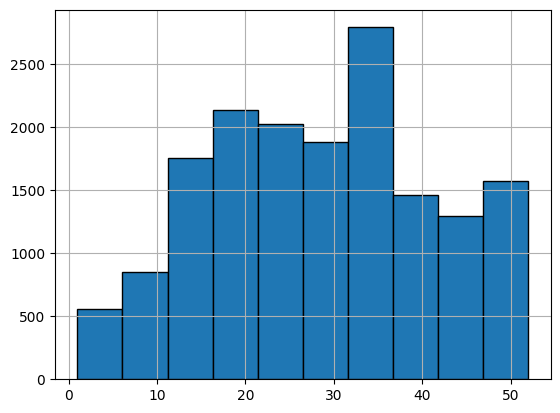

In [116]:
X_train['housing_median_age'].hist(edgecolor="black")
plt.show()

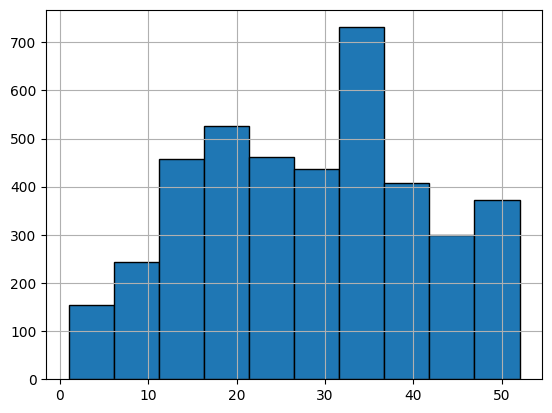

In [117]:
X_test['housing_median_age'].hist(edgecolor="black")
plt.show()

## Entrenamiento del modelo

Se trata de un caso típico de regresión. Vamos a probar en primer lugar la **regresión lineal** (`LinearRegression`).

In [118]:
from sklearn.linear_model import LinearRegression

housing_model = LinearRegression()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
 134700.00      141492.14           6792.14
 194600.00      197366.93           2766.93
 186300.00      242016.39          55716.39
 131300.00      152758.92          21458.92
 257400.00      267283.06           9883.06
 369700.00      298872.90          70827.10
 156000.00      310553.26         154553.26
 181300.00       79162.71         102137.29
  89400.00      100738.21          11338.21
 127000.00      122690.26           4309.74
 268500.00      285836.78          17336.78
  94600.00      190035.65          95435.65
 266900.00      272579.47           5679.47
 143300.00       42063.84         101236.16
 472700.00      323443.95         149256.05
 231800.00      188323.96          43476.04
 366300.00      331189.53          35110.47
 157700.00      227282.65          69582.65
 158500.00      184352.74          25852.74
 147600.00      170744.07          23144.07


In [119]:
from sklearn.metrics import mean_squared_error, r2_score

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  69802.76889199558
Coeficiente de determinación:  0.6282986162976609


Probamos con árboles de decisión.

In [120]:
from sklearn.tree import DecisionTreeRegressor

housing_model = DecisionTreeRegressor()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
 134700.00      125900.00           8800.00
 194600.00      198200.00           3600.00
 186300.00      191200.00           4900.00
 131300.00      114500.00          16800.00
 257400.00      224100.00          33300.00
 369700.00      361700.00           8000.00
 156000.00      255400.00          99400.00
 181300.00      110300.00          71000.00
  89400.00       68500.00          20900.00
 127000.00      113500.00          13500.00
 268500.00      288500.00          20000.00
  94600.00      117300.00          22700.00
 266900.00      222000.00          44900.00
 143300.00      118800.00          24500.00
 472700.00      495500.00          22800.00
 231800.00      167200.00          64600.00
 366300.00      344200.00          22100.00
 157700.00      126900.00          30800.00
 158500.00      147500.00          11000.00
 147600.00      143300.00           4300.00


In [121]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  70062.53622498768
Coeficiente de determinación:  0.6255269342438285


Probamos ahora con random forest.

In [122]:
from sklearn.ensemble import RandomForestRegressor

housing_model = RandomForestRegressor()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real    Prec. estimado   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}   {e:12.2f}  {e_abs:16.2f}")

Prec. real    Prec. estimado   Error absoluto
 134700.00      103701.00          30999.00
 194600.00      212219.00          17619.00
 186300.00      219362.00          33062.00
 131300.00      172179.00          40879.00
 257400.00      255411.00           1989.00
 369700.00      365470.16           4229.84
 156000.00      321969.10         165969.10
 181300.00      164480.01          16819.99
  89400.00       74834.00          14566.00
 127000.00      141393.00          14393.00
 268500.00      311385.01          42885.01
  94600.00      158629.00          64029.00
 266900.00      198526.00          68374.00
 143300.00       73261.00          70039.00
 472700.00      399154.10          73545.90
 231800.00      175654.00          56146.00
 366300.00      379615.08          13315.08
 157700.00      176262.00          18562.00
 158500.00      140181.00          18319.00
 147600.00      149557.00           1957.00


In [123]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  48873.51651797163
Coeficiente de determinación:  0.8177799951998053


In [124]:
import joblib

In [125]:
joblib.dump(value=housing_model, filename="/content/drive/MyDrive/IA_datasets/housing_model.pkl")

['/content/drive/MyDrive/IA_datasets/housing_model.pkl']